## DBSCAN
-  밀도 기반 군집화의 대표적 알고리즘
-  간단하고 직관적이지만 기하학적으로 복잡한 세트도 효과적으로 군집화 가능
 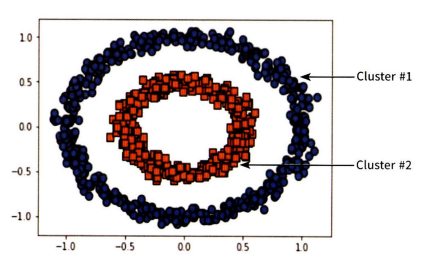
1.  입실론 주변 영역 : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
2.  최소 데이터 개수 : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
* 핵심 포인트 | 최소 데이터 개수 이상의 타 데이터를 가지는 경우
* 이웃 포인트 | 주변 영역 내에 위치한 타데이터
* 경계 포인트 | 주변 영역 내에 최소 데이터 이상의 아웃 포인트를 가지지 않지만 핵심 포인트를 이웃 포인트로 가짐
* 잡음 포인트 | 주변 영역 내에 최소 데이터 이상의 아웃 포인트를 가지지 않고 핵심 포인트도 이웃 포인트로 가지지 않음


### DESCAN 군집화 적용

1. 최소 데이터 세트 6개
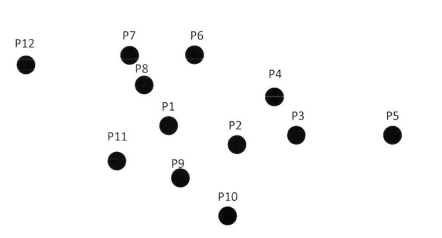
2. **P1**을 기준으로 입실론 반경 내 데이터는 7개, 최소 데이터 5개 이상을 만족하므로 핵심 포인트
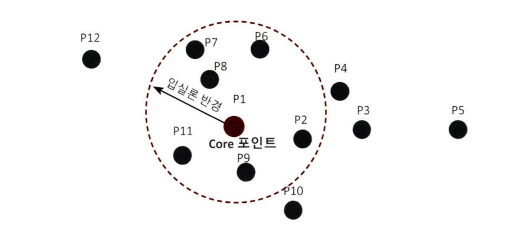
3. **P2**를 기준으로 반경 내 6개의 데이터 존재하므로 P2도 핵심 포인트
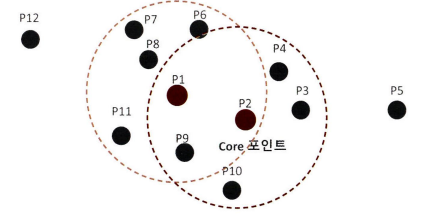
4. 핵심포인트 P1의 이웃포인트 P2도 핵심 포인트일 경우 P1에서 P2로 연결해 직접 접근가능
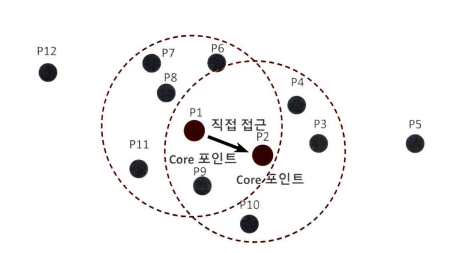
5. 특정 핵심포인트에서 직접 접근 가능한 다른 핵심 포인트를 서로 연결하며 군집화 구성
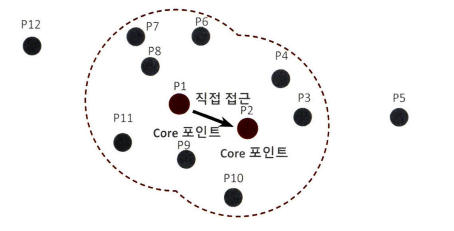
6. **P3**의 경우 반경 내 이웃 데이터는 P2, P4로 핵심 포인트 될 수 x (자신은 핵심 포인트가 아니나 이웃 데이터가 핵심포인트인 경계 포인트), 경계 포인트는 군집의 외곽을 형성
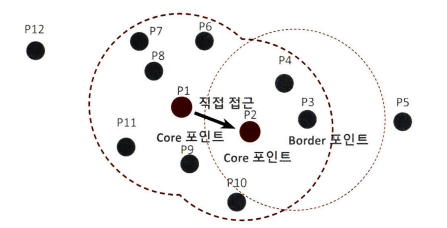
7. **P5**처럼 반경 내 최소데이터도 가지지 않고 핵심 포인트를 이웃 포인트로 가지지 않는 데이터는 잡음 포인트
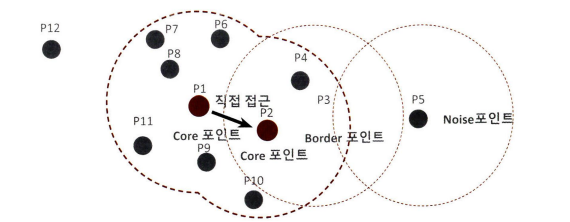

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# 좀더 편리한 데이터 핸들링 위해 df 변환
irisDF =pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target
from sklearn.datasets import load_iris
iris = load_iris()
### DBSCAN 적용 - 붓꽃 데이터 세트
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples = 8, metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


- -1이 군집 레이블 (노이즈에 속함)
- DESCAN은 알고리즘에 따라 군집 개수를 자동 지정

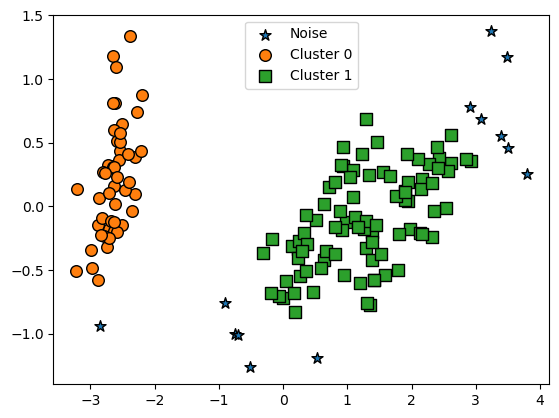

In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# 2차원 시각화를 위해 pca n_components=2 로 피처 데이터세트 변화
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 별표는 모두 노이즈
- eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요
- eps 값 크게 : 반경이 커져 포함 데이터 개수 증가로 노이즈데이터 감소
- min_samples 값 크게 : 노이즈 데이터 증가

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


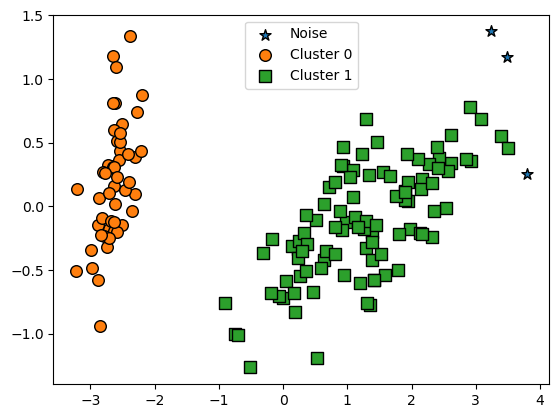

In [14]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples = 8, metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster',iscenter=False)

- 노이즈 -1인 군집이 3개
- 기존 eps가 0.6일떄 노이즈로 분류된 데이터세트는 반경이 커지며 cluster1 에 소속됨

In [15]:
dbscan = DBSCAN(eps=0.6, min_samples= 16, metric='euclidean')

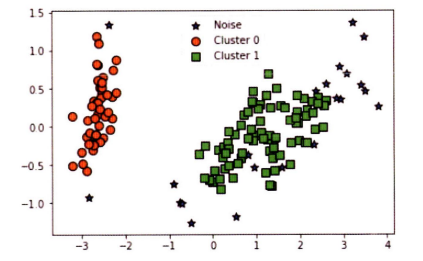

### DBSCAN 적용 - make_circles () 데이터 세트

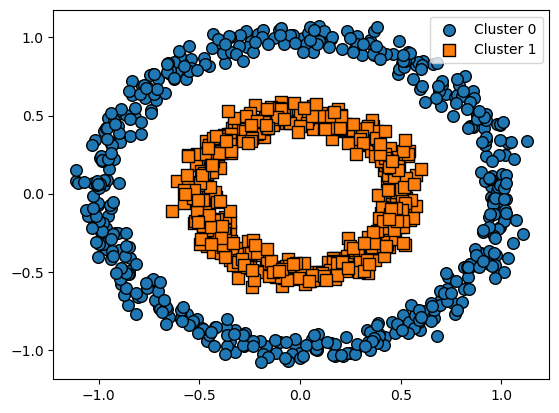

In [17]:
from sklearn.datasets  import make_circles
X,y= make_circles(n_samples = 1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


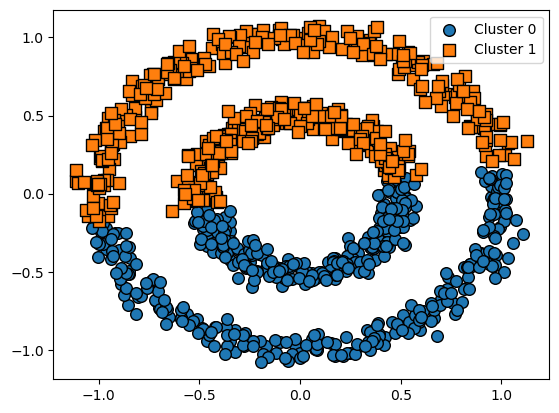

In [21]:
# kmeans로 군집화 수행
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels= kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster',iscenter=False)

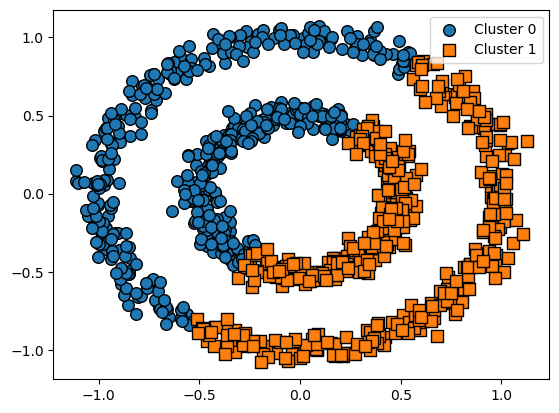

In [27]:
# gmm으로 make_circles() 군집화
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels= gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_labels
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster',iscenter=False)

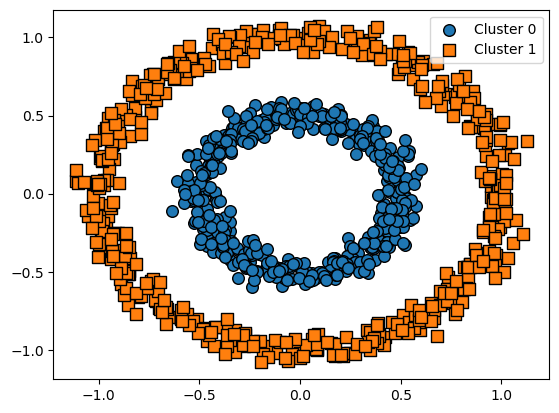

In [26]:
# dbscan으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

 DBSCAN으로 군집화를 적용해 원하는 방향으로 정확히 군집화가 됐음